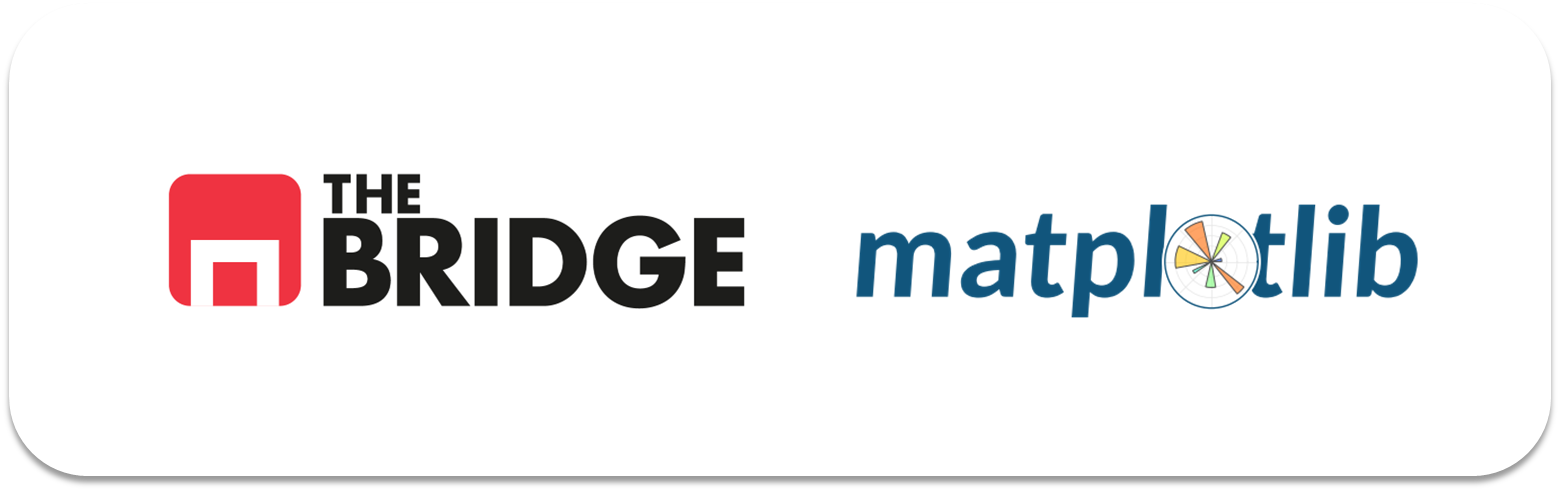

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [3]:
cities = pd.read_csv("./data/california_cities.csv")
cities.dropna(inplace = True)
print(cities.info())
cities.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB
None


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los números de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de una ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

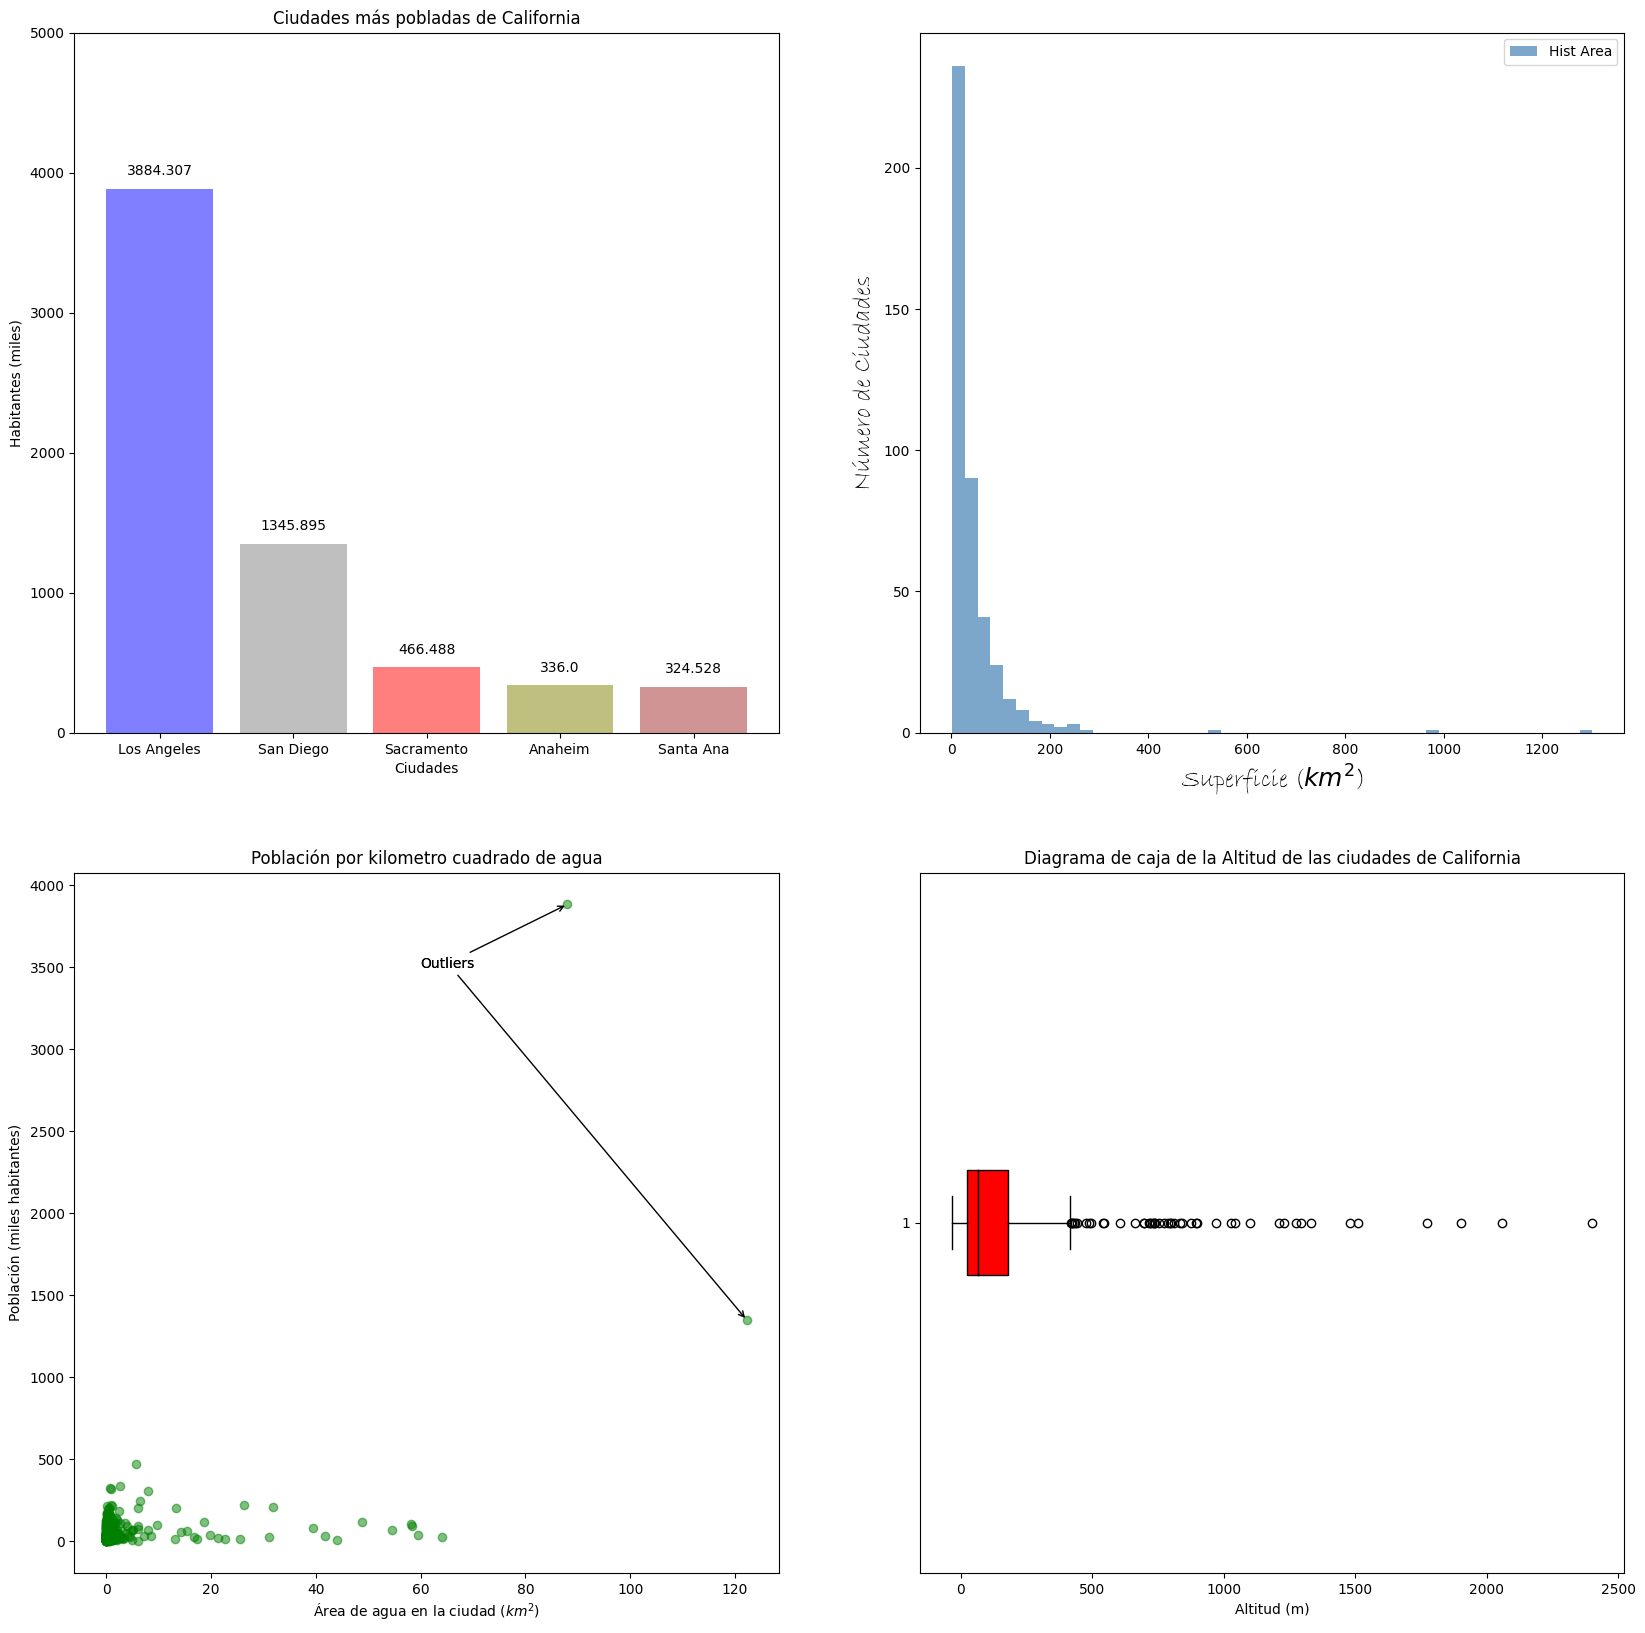

#### Axe 1

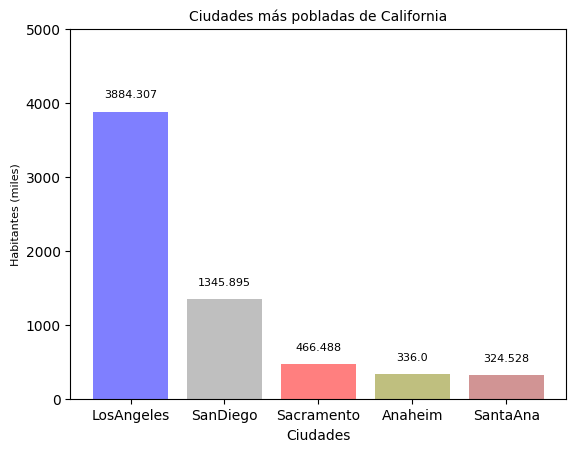

In [4]:
# Creo un data frame de las 5 ciudades más pobladas
df_ciudades_mas_pobladas = cities.sort_values(ascending = False, by = "population_total").head(5)
df_ciudades_mas_pobladas['city'].str.replace(r"([a-z])([A-Z])", r"\1 \2")

# Creo los datos que quiero señalar en el gráfico de barras
ciudades = df_ciudades_mas_pobladas['city']
habitantes = df_ciudades_mas_pobladas['population_total']/1000

ax1 = plt.axes() # Creo un axes

ax1.bar(ciudades, habitantes, # Creo el gráfico de barras
       color = ['blue', 'grey', 'red', 'olive', 'brown'], # Elijo los colores para cada barra 
       alpha = 0.5) # Transparencia de las barras

ax1.set_title("Ciudades más pobladas de California", # Título del gráfico
              fontsize = 10) # Tamaño de la letra 

ax1.set_xlabel("Ciudades", # Descripción eje x
               fontsize = 10) # Tamaño de la letra

ax1.set_ylabel("Habitantes (miles)", # Descripción eje y
               fontsize = 8) # Tamaño de la letra

ax1.set_ylim(0, 5000) # Valores límites del eje y

for p in ax1.patches: # Muestro la población de cada ciudad en el gráfico
    ax1.annotate(text = p.get_height(), # Lo que quiero anotar (la altura de la barra)
                xy = (p.get_x() + p.get_width()/2, p.get_height()), # Dónde lo quiero anotar (en el centro del extremo superior de la barra)
                ha = 'center', # Texto horizontalmente centrado en la posición "xy"
                xytext = (0, 10), # Desplaza el texto con respecto a la posición que le he dado anteriormente en "xy" (10 puntos hacia arriba)
                textcoords = 'offset points', # Desplazamiento en puntos
                fontsize = 8) # Tamaño de la letra

#### Axe 2

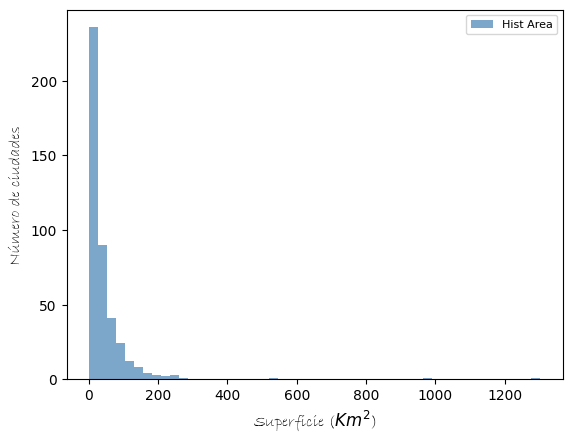

In [5]:
ax2 = plt.axes() # Creo un axes

ax2.hist(cities["area_total_km2"], # Creo el histograma del área total en km2
         bins = 50, # Saltos de 50 bins
         color = "steelblue", # Color del histograma
         alpha = 0.7) # Transparencia

ax2.set_xlabel(r"Superficie ($Km^2$)", # Descripción eje x
               fontfamily = "Bradley Hand itc", # Fuente de la letra
               fontsize = 12) # Tamaño de la letra

ax2.set_ylabel("Número de ciudades", # Descripción eje y
               fontfamily = "Bradley Hand itc", # Fuente de la letra
               fontsize = 12) # Tamaño de la letra

ax2.legend(["Hist Area"], loc = "upper right", fontsize = 8);

#### Axe 3

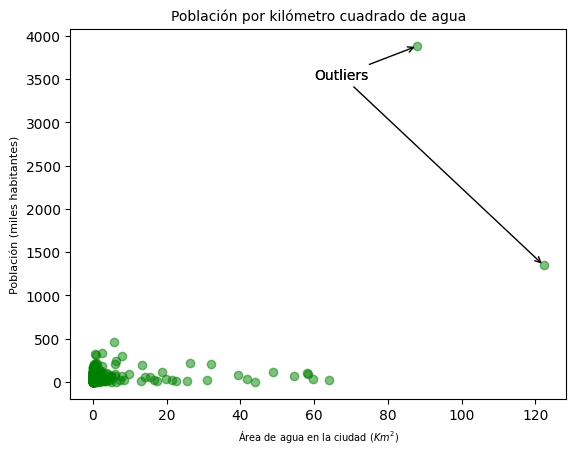

In [6]:
ax3 = plt.axes() # Creo un axes

ax3.scatter(cities['area_water_km2'], cities['population_total']/1000, # Elaboro el scatterplot
            color = "green", # Color verde
            alpha = 0.5) # Transparencia

ax3.set_title("Población por kilómetro cuadrado de agua", # Título del gráfico
              fontsize = 10) # Tamaño de la letra 

ax3.set_xlabel(r"Área de agua en la ciudad ($Km^2$)", # Descripción eje x
               fontsize = 7) # Tamaño de la letra

ax3.set_ylabel("Población (miles habitantes)", # Descripción eje y
               fontsize = 8) # Tamaño de la letra

# Identificamos los outliers como las 2 ciudades con mayor área de agua
outliers = cities.nlargest(2, 'area_water_km2') # Saco los outliers
for index, row in outliers.iterrows():
    ax3.annotate(text = 'Outliers', # Lo que quiero anotar
                 xy = (row['area_water_km2'], row['population_total']/1000), # Coordenadas de la punta de las flechas
                 xytext = (60, 3500), # Colocación del texto
                 arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3, rad = 0."), # Características de las flechas
                 fontsize = 10) # Tamaño de la letra

#### Axe 4

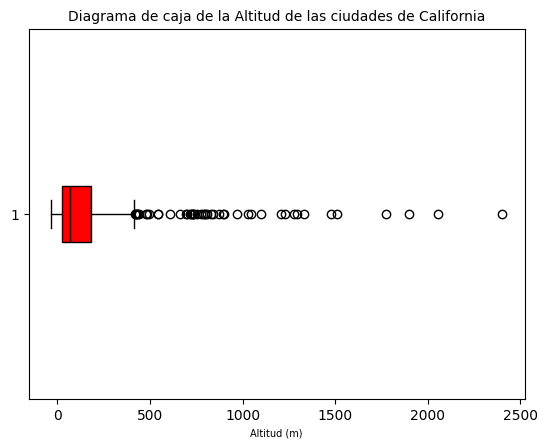

In [7]:
ax4 = plt.axes() # Creo un axes

ax4.boxplot(cities['elevation_m'], # Elaboro el boxblot
            vert = False, # Lo pongo en horizontal
            patch_artist = True,
            boxprops = dict(facecolor = "red"), # Pinto la caja de rojo
            medianprops = dict(color = "black")) # Pinto la línea de la mediana de color negro

ax4.set_title("Diagrama de caja de la Altitud de las ciudades de California", # Título del gráfico
              fontsize = 10) # Tamaño de la letra 

ax4.set_xlabel("Altitud (m)", # Descripción eje x
               fontsize = 7); # Tamaño de la letra

In [8]:
# ax.ticklabel_format(style='plain') # Quita la notación científica

#### Unión de los Axes

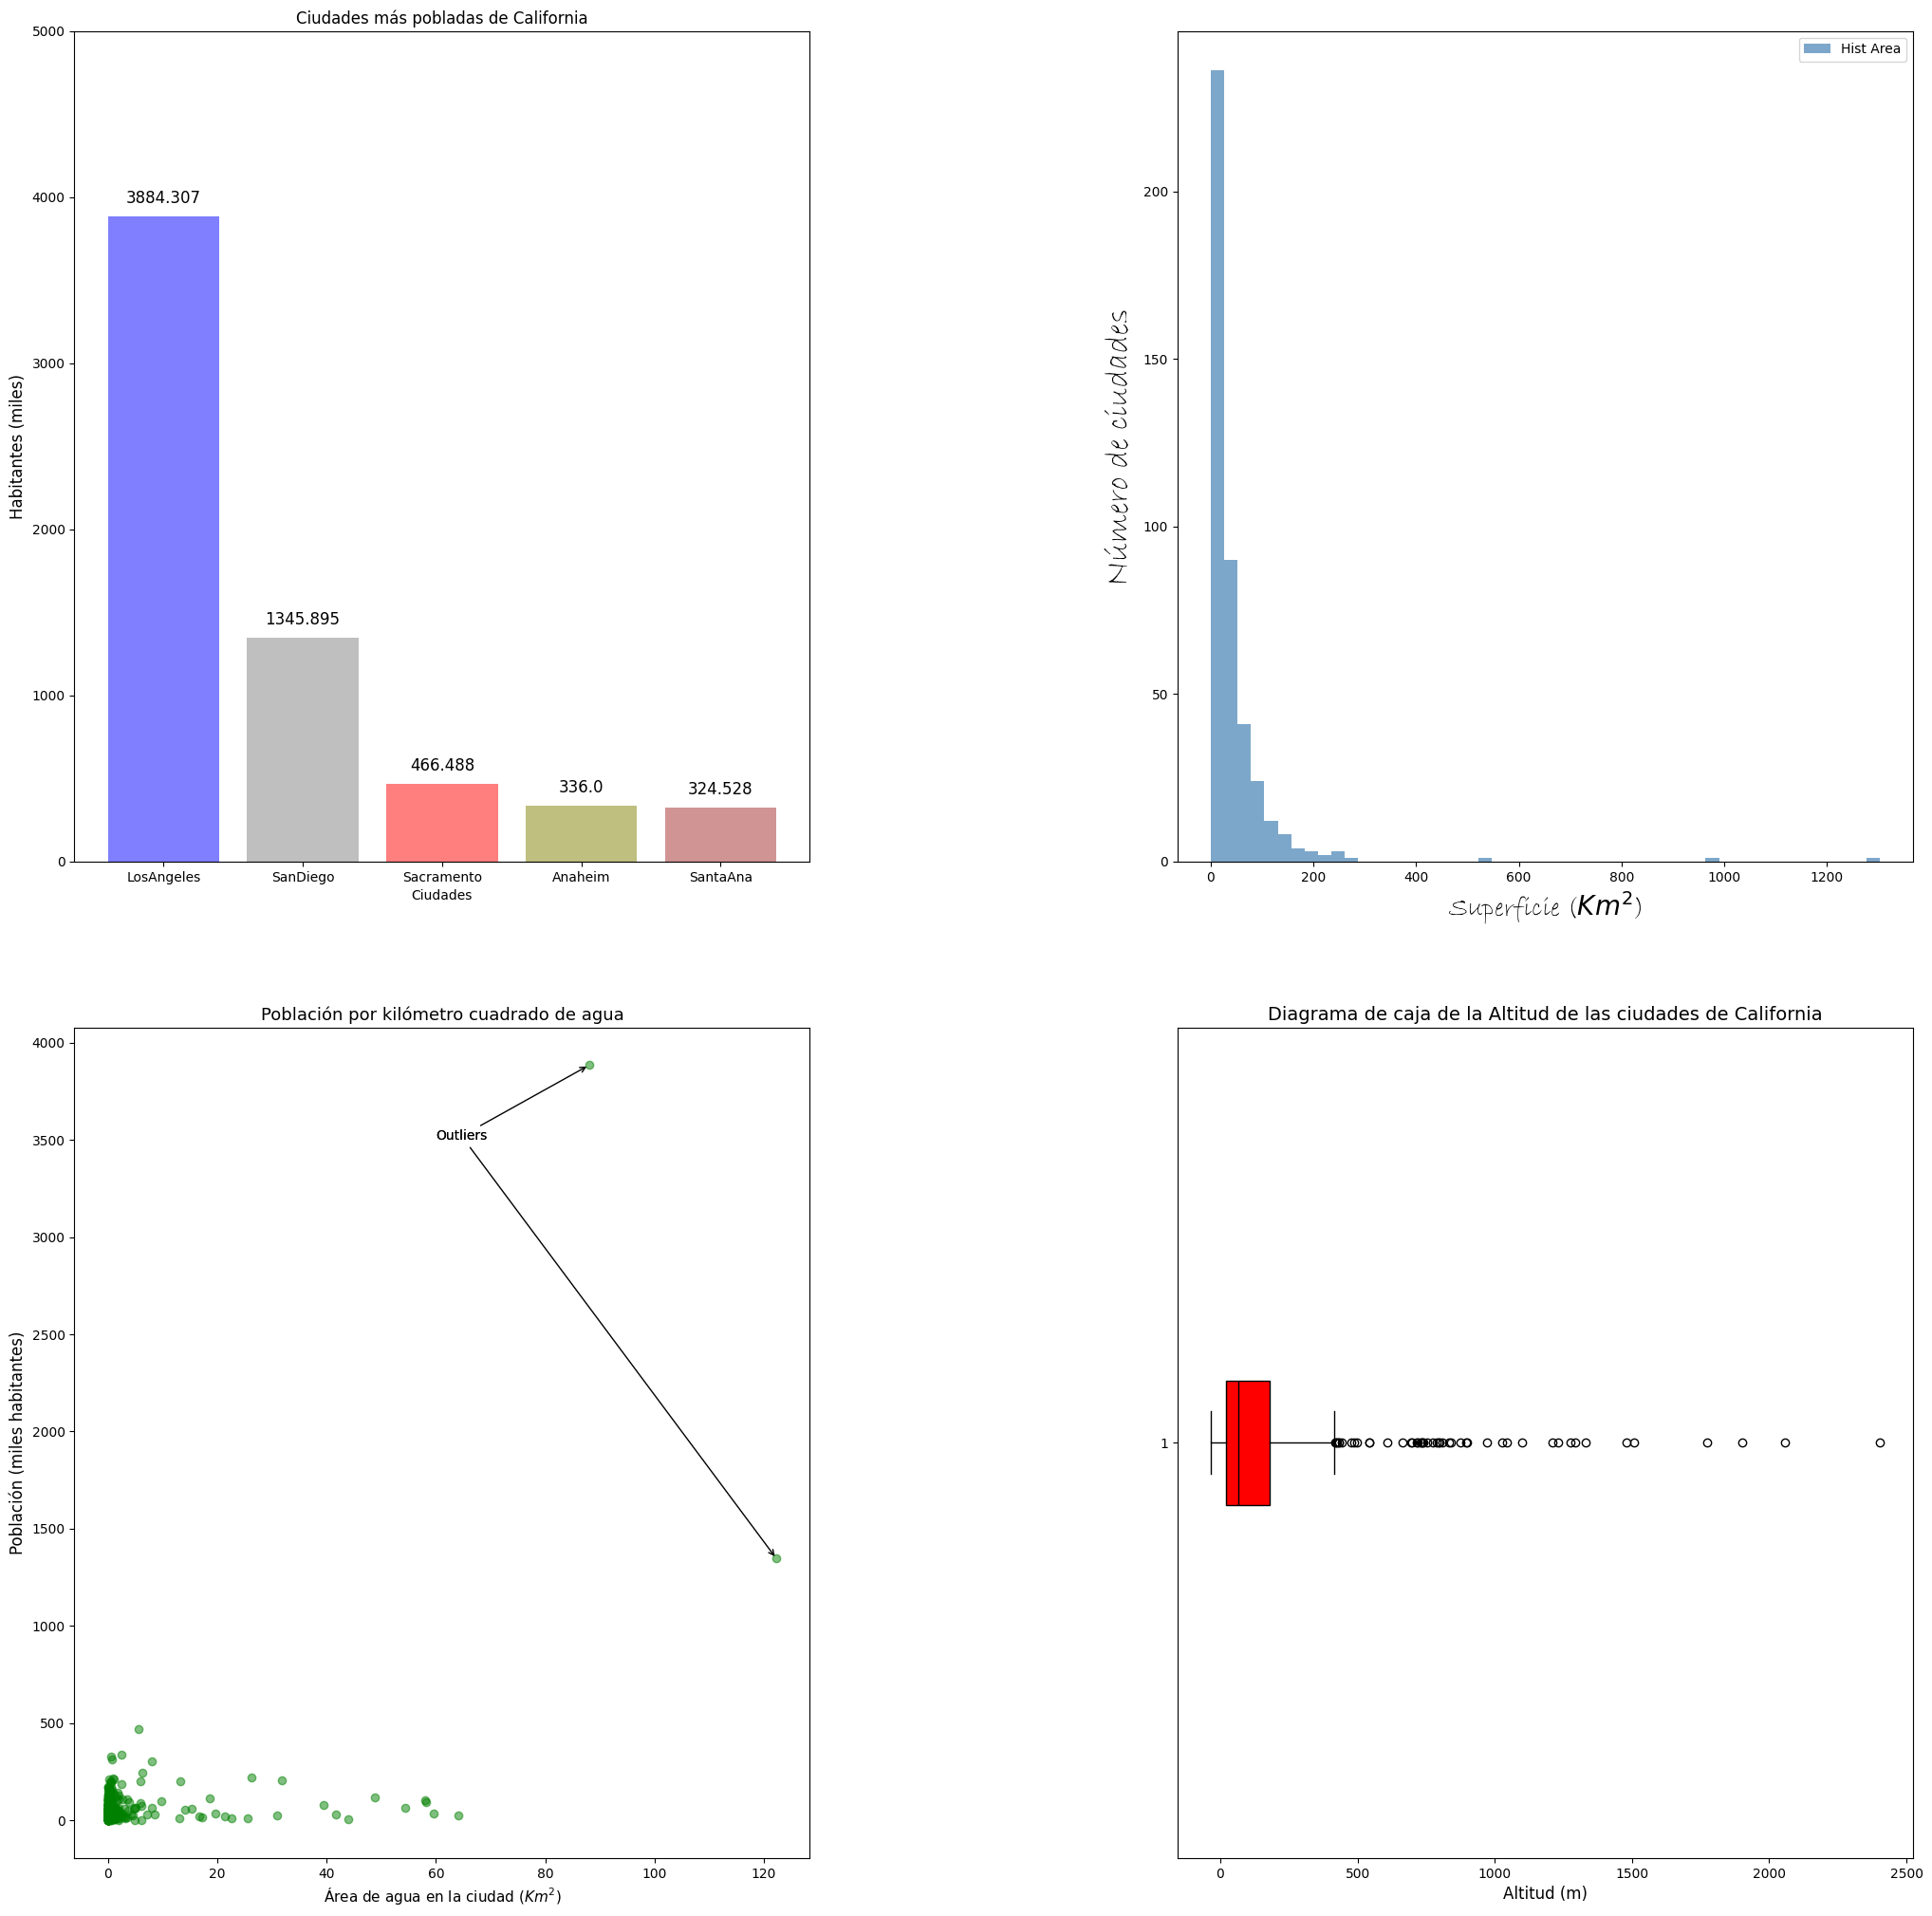

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (25, 25))
fig.subplots_adjust(wspace = 0.5)

# AX[0, 0]
ax[0, 0].bar(ciudades, habitantes, # Creo el gráfico de barras
       color = ['blue', 'grey', 'red', 'olive', 'brown'], # Elijo los colores para cada barra 
       alpha = 0.5) # Transparencia de las barras

ax[0, 0].set_title("Ciudades más pobladas de California", # Título del gráfico
              fontsize = 12) # Tamaño de la letra 

ax[0, 0].set_xlabel("Ciudades", # Descripción eje x
               fontsize = 10) # Tamaño de la letra

ax[0, 0].set_ylabel("Habitantes (miles)", # Descripción eje y
               fontsize = 12) # Tamaño de la letra

ax[0, 0].set_ylim(0, 5000) # Valores límites del eje y

for p in ax[0, 0].patches: # Muestro la población de cada ciudad en el gráfico
    ax[0, 0].annotate(text = p.get_height(), # Lo que quiero anotar (la altura de la barra)
                xy = (p.get_x() + p.get_width()/2, p.get_height()), # Dónde lo quiero anotar (en el centro del extremo superior de la barra)
                ha = 'center', # Texto horizontalmente centrado en la posición "xy"
                xytext = (0, 10), # Desplaza el texto con respecto a la posición que le he dado anteriormente en "xy" (10 puntos hacia arriba)
                textcoords = 'offset points', # Desplazamiento en puntos
                fontsize = 12) # Tamaño de la letra


# AX[0, 1]
ax[0, 1].hist(cities["area_total_km2"], # Creo el histograma del área total en km2
         bins = 50, # Saltos de 50 bins
         color = "steelblue", # Color del histograma
         alpha = 0.7) # Transparencia

ax[0, 1].set_xlabel(r"Superficie ($Km^2$)", # Descripción eje x
               fontfamily = "Bradley Hand itc", # Fuente de la letra
               fontsize = 20) # Tamaño de la letra

ax[0, 1].set_ylabel("Número de ciudades", # Descripción eje y
               fontfamily = "Bradley Hand itc", # Fuente de la letra
               fontsize = 25) # Tamaño de la letra

ax[0, 1].legend(["Hist Area"], loc = "upper right", fontsize = 10)


# AX[1, 0]
ax[1, 0].scatter(cities['area_water_km2'], cities['population_total']/1000, # Elaboro el scatterplot
            color = "green", # Color verde
            alpha = 0.5) # Transparencia

ax[1, 0].set_title("Población por kilómetro cuadrado de agua", # Título del gráfico
              fontsize = 13) # Tamaño de la letra 

ax[1, 0].set_xlabel(r"Área de agua en la ciudad ($Km^2$)", # Descripción eje x
               fontsize = 11) # Tamaño de la letra

ax[1, 0].set_ylabel("Población (miles habitantes)", # Descripción eje y
               fontsize = 12) # Tamaño de la letra

# Identificamos los outliers como las 2 ciudades con mayor área de agua
outliers = cities.nlargest(2, 'area_water_km2') # Saco los outliers
for index, row in outliers.iterrows():
    ax[1, 0].annotate(text = 'Outliers', # Lo que quiero anotar
                 xy = (row['area_water_km2'], row['population_total']/1000), # Coordenadas de la punta de las flechas
                 xytext = (60, 3500), # Colocación del texto
                 arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3, rad = 0.")) # Características de las flechas
    

# AX[1, 1]
ax[1, 1].boxplot(cities['elevation_m'], # Elaboro el boxblot
            vert = False, # Lo pongo en horizontal
            patch_artist = True,
            boxprops = dict(facecolor = "red"), # Pinto la caja de rojo
            medianprops = dict(color = "black")) # Pinto la línea de la mediana de color negro

ax[1, 1].set_title("Diagrama de caja de la Altitud de las ciudades de California", # Título del gráfico
              fontsize = 14) # Tamaño de la letra 

ax[1, 1].set_xlabel("Altitud (m)", # Descripción eje x
               fontsize = 12); # Tamaño de la letra

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [10]:
# Guardo la imagen
fig.savefig('./graficas_California.png')